# Explainable AI Assignment
This is a template for Assignment 2 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 

If you want to do something extra and show us your creativity, we have also created a space for it at the end!

# Task 1

## Import Libraries

In [1]:
#Importing the relevant libraries
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Load the data
Display the first 5 rows of the data after loading.

In [2]:
heart_train_  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
heart_train=heart_train_
heart_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Perform Basic Exploratory Data Analysis

In [3]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [4]:
heart_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_train.skew()

age        -0.268034
sex        -0.820789
cp          0.535785
trestbps    0.571733
chol        1.302705
fbs         1.817011
restecg     0.141633
thalach    -0.474609
exang       0.727326
oldpeak     1.249342
slope      -0.588684
ca          1.224102
thal       -0.634908
target     -0.171644
dtype: float64

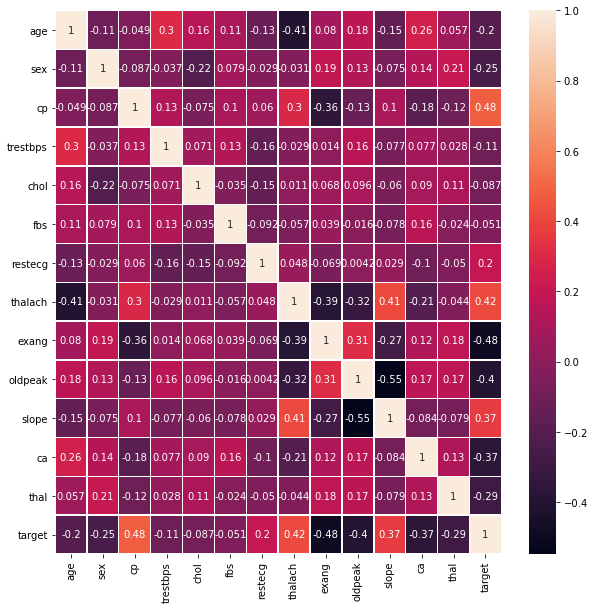

In [6]:
# Correlation matrix completely ignores any non-numeric column. 
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(heart_train.corr(), annot=True,linewidths=.5, ax=ax)
plt.show()

In [7]:
heart_train["target"].value_counts()

#imbalance is approximately 16%

1    115
0     97
Name: target, dtype: int64

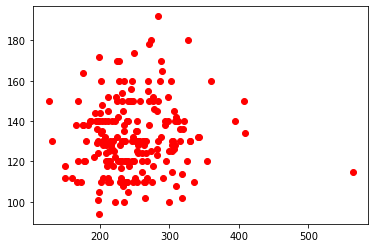

In [8]:
plt.scatter(heart_train.chol, heart_train.trestbps, color="r", label = 'cholesterol vs Blood pressure')

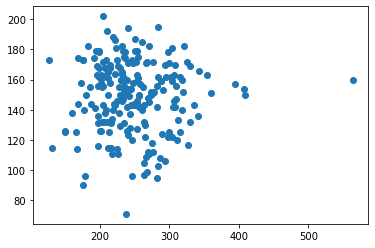

In [9]:
plt.scatter(heart_train.chol, heart_train.thalach, label='cholesterol vs max heart rate') 

## Separate the Input and Target Features of the data

In [10]:
#Defining the dependant and independant variables

X = heart_train.drop('target', axis = 1)
Y = heart_train[['target']]
X.shape,Y.shape

((212, 13), (212, 1))

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [11]:
X_train, X_test,Y_train, Y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## Scale your data if required

## NOT REQUIRED

In [12]:
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.fit_transform(X_test)

# Task 2

## Build a Logistic Regression Model on train set

In [13]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluate the model using F1 Score

              precision    recall  f1-score   support

           0       0.87      0.65      0.74        20
           1       0.75      0.91      0.82        23

    accuracy                           0.79        43
   macro avg       0.81      0.78      0.78        43
weighted avg       0.80      0.79      0.79        43



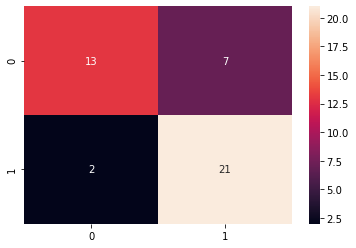

In [14]:
print(classification_report(Y_test,lg.predict(X_test)))
cnf=confusion_matrix(Y_test,lg.predict(X_test))
sns.heatmap(cnf,annot=True)

# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [15]:
import shap

In [16]:
explainer = shap.LinearExplainer(lg, X_train)
shap_values = explainer.shap_values(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [17]:
shap_values_df=pd.DataFrame(shap_values, columns=heart_train.drop('target', axis = 1).columns)

In [18]:
shap_values_df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.094596,-0.133881,-1.275258,-0.248800,-0.149457,0.047311,-0.676769,-0.223064,0.394233,-0.464464,-0.367319,-0.815631,0.785358
1,-0.041840,-0.133881,0.067119,0.059885,0.087916,0.047311,0.553720,0.202547,0.394233,0.305062,0.367319,0.521469,0.181236
2,-0.078223,-0.133881,2.751872,0.471465,0.079124,0.047311,0.553720,-0.223064,0.394233,-0.024735,-0.367319,0.521469,-0.422885


In [19]:
#X_test=pd.DataFrame(X_test,columns=heart_train.drop('target', axis = 1).columns)

In [20]:
X_test.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
5,64,1,0,145,212,0,0,132,0,2.0,1,2,1
205,49,1,1,130,266,0,1,171,0,0.6,2,0,2
110,45,1,3,110,264,0,1,132,0,1.2,1,0,3


In [21]:
X_test.mean()

age          55.906977
sex           0.720930
cp            1.000000
trestbps    131.023256
chol        238.627907
fbs           0.139535
restecg       0.674419
thalach     146.209302
exang         0.279070
oldpeak       0.925581
slope         1.255814
ca            0.651163
thal          2.162791
dtype: float64

In [22]:
X_test.iloc[0, :]

age          64.0
sex           1.0
cp            0.0
trestbps    145.0
chol        212.0
fbs           0.0
restecg       0.0
thalach     132.0
exang         0.0
oldpeak       2.0
slope         1.0
ca            2.0
thal          1.0
Name: 5, dtype: float64

## Write your inferences from the generated plot.

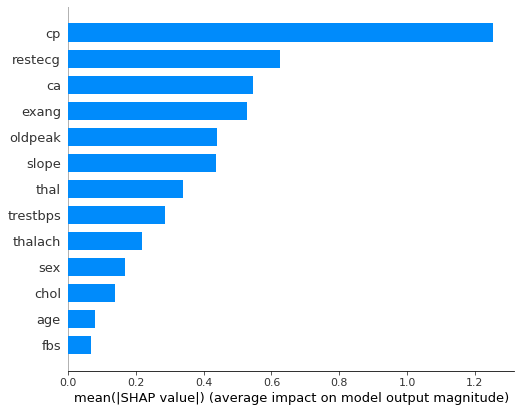

In [23]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

Chest pain type (cg), Exercise induced angina(exchang), Resting electrocardiographic results (restecg), Number of major vessels (0-3) colored by fluoroscopy(ca) are the four most imprtant features of the datset which influences the target variable.

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [24]:
Y_test.iloc[0].values, lg.predict(X_test)[0]

(array([0], dtype=int64), 0)

In [25]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test.iloc[0, :])

In [26]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :])

## Write your inferences from the generated plot.

1. The features in red color signifies that these features are pushing the predictions towards right or high (1)  

2. The features in blue color signifies that these features are pushing the predictions towards left or low (0)

3. Features for the 1st row (index 0) whose value is less than the mean value (X_test.mean()) are pushing the predictions towards right or high (1). Eg : thalach

4. Features for the 1st row (index 0) whose value is more than the mean value (X_test.mean()) are pushing the predictions towards left r low (0). Eg : oldpeak

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [27]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

## Write your inferences from the generated plot.

The above Y-axis is the X-axis of the individual force plot. There are 43 data points in our X_test, so the X-axis has 43 observations.

Each observation has its own force plot. If all the force plots are combined, rotated 90 degrees and stacked horizontally, we get the force plot of the entire data X_test. 

The thickness of red and blue represents the final prediction at that point.

# Task 6

## Plot a SHAP summary plot using all the features in the data

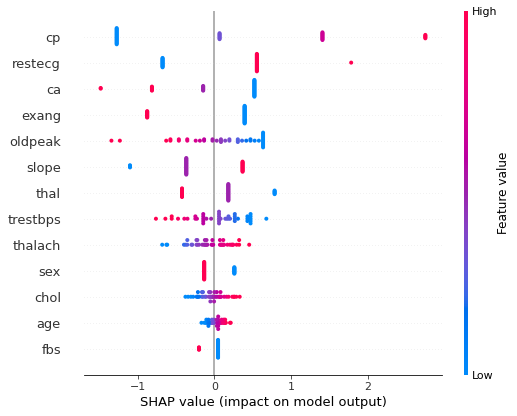

In [28]:
shap.summary_plot(shap_values, X_test)

It shows the positive and negative relationships of the predictors with the target variable. It looks dotty because it is made of all the dots in the train data.

a. Feature importance: Variables are ranked in descending order.

b. Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

c. Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

d. Correlation: A high level of the “cp”  has a high and positive impact on the "target" variable. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. This data can also be realized from correlation heatmaps.

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

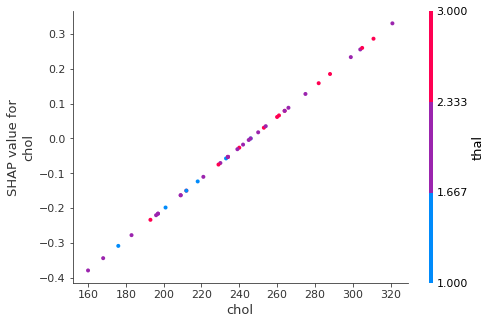

In [29]:
shap.dependence_plot("chol", shap_values, X_test)

## Write your inferences from the generated plot.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

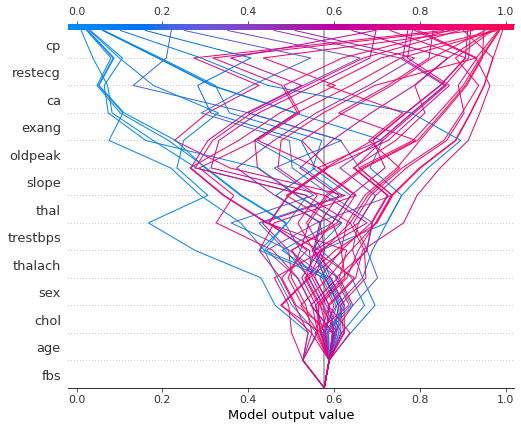

In [30]:
shap.decision_plot(explainer.expected_value, shap_values, X_train.columns,link='logit')

#                                             **INFERENCE :** 

The x-axis represents the model’s output. In this case, the units are log odds. The plot is centered on the x-axis at expainer.expected_value. All SHAP values are relative to the model’s expected value like a linear model’s effects are relative to the intercept. * The y-axis lists the model’s features. By default, the features are ordered by descending importance.* The importance is calculated over the observations plotted. This is usually different than the importance ordering for the entire dataset. In addition to feature importance ordering, the decision plot also supports hierarchical cluster feature ordering and user-defined feature ordering. Each observation’s prediction is represented by a colored line. At the top of the plot, each line strikes the x-axis at its corresponding observation’s predicted value. This value determines the color of the line on a spectrum. Moving from the bottom of the plot to the top, SHAP values for each feature are added to the model’s base value. This shows how each feature contributes to the overall prediction.

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, rename this file as **firstname_lastname_XAI.ipynb**, Download it and submit it on the platform. 